In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [19]:
# Caminho para o diretório de dados
data_dir = os.path.join('..', '..', 'test')

In [20]:
# Definir geradores de dados com e sem data augmentation
datagen_no_aug = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)
datagen_aug = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [21]:
# Carregar dados de treino e validação (sem data augmentation)
train_generator_no_aug = datagen_no_aug.flow_from_directory(
    data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator_no_aug = datagen_no_aug.flow_from_directory(
    data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [22]:
# Carregar dados de treino e validação (com data augmentation)
train_generator_aug = datagen_aug.flow_from_directory(
    data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator_aug = datagen_no_aug.flow_from_directory(
    data_dir,
    target_size=(32, 32),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [23]:
#criacao do modelo

def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model


In [24]:
# Treinamento sem data augmentation
model_s_no_aug = create_model()
model_s_no_aug.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history_no_aug = model_s_no_aug.fit(
    train_generator_no_aug,
    epochs=10,
    validation_data=validation_generator_no_aug
)

Epoch 1/10
250/250 [==============================] - 3s 11ms/step - loss: 1.9706 - accuracy: 0.2729 - val_loss: 1.8993 - val_accuracy: 0.3020
Epoch 2/10
250/250 [==============================] - 3s 10ms/step - loss: 1.6089 - accuracy: 0.4076 - val_loss: 1.6073 - val_accuracy: 0.4125
Epoch 3/10
250/250 [==============================] - 3s 10ms/step - loss: 1.4279 - accuracy: 0.4849 - val_loss: 1.6015 - val_accuracy: 0.4335
Epoch 4/10
250/250 [==============================] - 3s 11ms/step - loss: 1.3251 - accuracy: 0.5221 - val_loss: 1.4331 - val_accuracy: 0.4735
Epoch 5/10
250/250 [==============================] - 3s 11ms/step - loss: 1.2369 - accuracy: 0.5570 - val_loss: 1.5200 - val_accuracy: 0.4525
Epoch 6/10
250/250 [==============================] - 3s 11ms/step - loss: 1.1739 - accuracy: 0.5753 - val_loss: 1.4124 - val_accuracy: 0.5045
Epoch 7/10
250/250 [==============================] - 3s 11ms/step - loss: 1.1026 - accuracy: 0.6090 - val_loss: 1.3265 - val_accuracy: 0.5300

In [25]:
# Treinamento com data augmentation
model_s_aug = create_model()
model_s_aug.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

history_aug = model_s_aug.fit(
    train_generator_aug,
    epochs=10,
    validation_data=validation_generator_aug
)

Epoch 1/10
250/250 [==============================] - 5s 20ms/step - loss: 2.0436 - accuracy: 0.2309 - val_loss: 1.8271 - val_accuracy: 0.2835
Epoch 2/10
250/250 [==============================] - 5s 20ms/step - loss: 1.8324 - accuracy: 0.3225 - val_loss: 1.7101 - val_accuracy: 0.3605
Epoch 3/10
250/250 [==============================] - 5s 19ms/step - loss: 1.7188 - accuracy: 0.3697 - val_loss: 1.6190 - val_accuracy: 0.3840
Epoch 4/10
250/250 [==============================] - 5s 19ms/step - loss: 1.6502 - accuracy: 0.3985 - val_loss: 1.7629 - val_accuracy: 0.3435
Epoch 5/10
250/250 [==============================] - 5s 19ms/step - loss: 1.6157 - accuracy: 0.4092 - val_loss: 1.6176 - val_accuracy: 0.3950
Epoch 6/10
250/250 [==============================] - 5s 19ms/step - loss: 1.5567 - accuracy: 0.4277 - val_loss: 1.5375 - val_accuracy: 0.4335
Epoch 7/10
250/250 [==============================] - 5s 19ms/step - loss: 1.5153 - accuracy: 0.4464 - val_loss: 1.4300 - val_accuracy: 0.4725

In [26]:
# Avaliar o modelo sem data augmentation
test_loss_no_aug, test_acc_no_aug = model_s_no_aug.evaluate(validation_generator_no_aug, verbose=2)
print(f'Test accuracy without data augmentation: {test_acc_no_aug}')

63/63 - 0s - loss: 1.3604 - accuracy: 0.5390 - 489ms/epoch - 8ms/step
Test accuracy without data augmentation: 0.5389999747276306


In [27]:
# Avaliar o modelo com data augmentation
test_loss_aug, test_acc_aug = model_s_aug.evaluate(validation_generator_aug, verbose=2)
print(f'Test accuracy with data augmentation: {test_acc_aug}')

63/63 - 0s - loss: 1.3450 - accuracy: 0.5195 - 486ms/epoch - 8ms/step
Test accuracy with data augmentation: 0.5195000171661377


In [28]:
# Função para plotar gráficos de acurácia e perda
def plot_history(histories, titles):
    for i, history in enumerate(histories):
        plt.figure(figsize=(12, 4))
        # Acurácia
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Treinamento')
        plt.plot(history.history['val_accuracy'], label='Validação')
        plt.title(f'Acurácia - {titles[i]}')
        plt.xlabel('Época')
        plt.ylabel('Acurácia')
        plt.legend()

        # Perda
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Treinamento')
        plt.plot(history.history['val_loss'], label='Validação')
        plt.title(f'Perda - {titles[i]}')
        plt.xlabel('Época')
        plt.ylabel('Perda')
        plt.legend()

        plt.show()

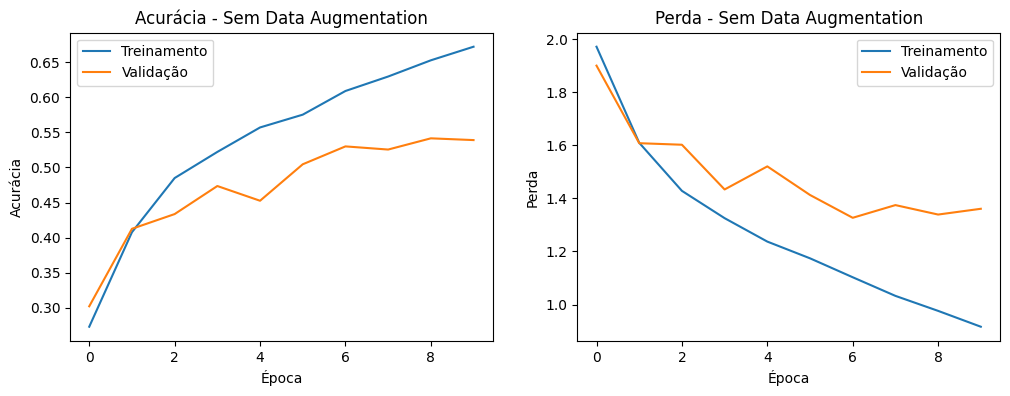

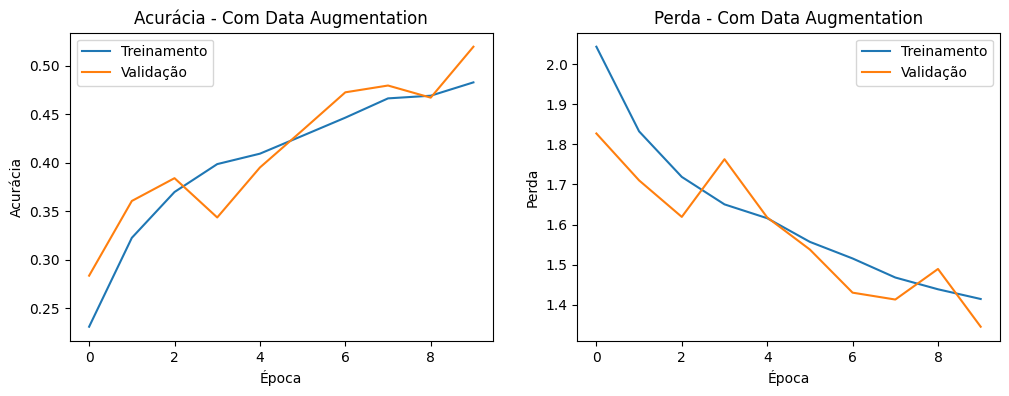

In [29]:
# Plotar os gráficos
plot_history([history_no_aug, history_aug], ['Sem Data Augmentation', 'Com Data Augmentation'])

In [30]:
# Salvar o modelo
model_s_no_aug.save('model_no_aug.h5')
model_s_aug.save('model_s_aug.h5')